# Домашняя работа

Будем работать с датасетом подержанных машин https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

Задача - построить прогноз цены машины по ее данным (год выпуска, пробег, расход, размер двигателя, тип коробки передач и тд).

## Easy

Построить прогноз по одной марке машин при помощи решающих деревьев, взять только числовые признаки. В качестве метрики взять r2_score. Оценить важность признаков, проинтерпретировать модель.



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

**Возьмем bmw в качестве исследуемой марки автомобиля**

In [2]:
data_bmw = pd.read_csv('../data/all_cars/bmw.csv')
data_bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [3]:
numeric_cols = data_bmw.select_dtypes(include=['number']).columns
numeric_cols

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [4]:
data_bmw_numerical = data_bmw[numeric_cols]
data_bmw_numerical

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0
...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0
10777,2016,14600,42947,125,60.1,2.0
10778,2017,13100,25468,200,42.8,2.0
10779,2014,9930,45000,30,64.2,2.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [6]:
X = data_bmw_numerical.drop('price', axis = 1)
y = data_bmw_numerical['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)
r2_score

0.8612670451518221

In [9]:
feature_importance_dict = dict(zip(X.columns, model.feature_importances_))
feature_importance_dict

{'year': 0.44661754940755266,
 'mileage': 0.10740790364621801,
 'tax': 0.01556494255724237,
 'mpg': 0.1614160621073231,
 'engineSize': 0.2689935422816638}

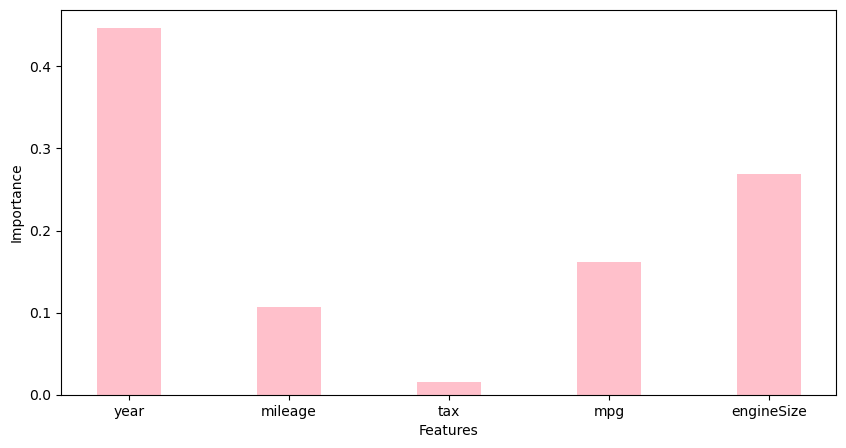

In [10]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(list(feature_importance_dict.keys()), list(feature_importance_dict.values()), color ='pink', width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

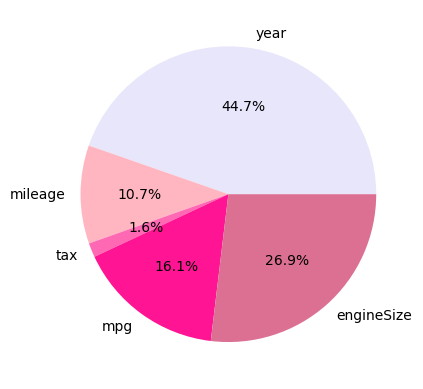

In [11]:
y = list(feature_importance_dict.values())
pink_colors = ["#E8E6FA"  , "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093"]

plt.pie(y, labels = list(feature_importance_dict.keys()), colors = pink_colors, autopct='%1.1f%%')
plt.show() 

Можно заметить, что год имеет наибольшую значимость для модели, объем двигателя имеет 2-е место по значимости, но при этом его значимость меньше значимости пробега примерно в 2 раза

Расход топлива автомобиля и пробег имеют примерно одинаковую, но очень небольшую значимость

Также налог имеет наименьшую значимость для модели 

## Normal

Объединить в один датафрейм данные по всем маркам машин. Преобразовать категориальные признаки.

Построить еще несколько моделей, используя подбор гиперпараметров. Сравнить между собой все построенные модели.

**Выпишем все марки автомобилей и объединим в один df**

In [12]:
cars = ['audi','bmw','cclass','focus','ford','hyundi','merc','skoda','toyota','vauxhall','vw']

In [13]:
all_cars = pd.DataFrame()
for car in cars:
    df = pd.read_csv(f'../data/all_cars/{car}.csv')
    all_cars = pd.concat([all_cars,df])

In [14]:
all_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,NaN
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,NaN
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,NaN
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,NaN


Можно заметить, что появилась колонка tax(£), которая есть не у всех марок автомобилей (например, bmw)

In [15]:
all_cars['tax(£)'].isna().sum()

103680

In [16]:
all_cars['tax'].isna().sum()

14213

In [17]:
for i in range (0,108540):
    if np.isnan(all_cars.iloc[i]['tax']) and np.isnan(np.isnan(all_cars.iloc[i]['tax(£)'])):
        print(all_cars.iloc[i]['tax(£)'])


Видно, что нет строк, где отсутствуют оба налога

In [18]:
all_cars.loc[all_cars['tax'].isnull(), 'tax'] = all_cars.loc[all_cars['tax'].isnull(), 'tax(£)']

In [19]:
all_cars['tax'].isna().sum()

9353

In [20]:
all_cars = all_cars.drop('tax(£)', axis = 1)
all_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


### Преобразование категориальных признаков

In [21]:
categorical = list(set(all_cars.columns) - set(numeric_cols))
categorical

['fuelType', 'transmission', 'model']

In [22]:
for feature in categorical:
    print(all_cars[feature].unique())

['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']
['Manual' 'Automatic' 'Semi-Auto' 'Other']
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' C Class' ' Focus' ' Fiesta' ' Puma' ' Kuga' ' EcoSport' ' C-MAX'
 ' Mondeo' ' Ka+' ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge'
 ' Tourneo Connect' ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang'
 ' Grand Tourneo Connect' ' Fusion' ' Ranger' ' Streetka' ' Escort'
 ' Transit Tourneo' ' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq'
 ' Kona' ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan'
 ' Getz' ' Amica' ' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class'
 ' GLA Class' ' A Class' ' B Class' ' GLC Class' ' E Class' ' GL Class'

In [23]:
all_cars = all_cars.drop('model', axis = 1) # можно удалить, так как о модели есть смысл говорить в рамках одной марки автомобиля
all_cars

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...
15152,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
15153,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
15154,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
15155,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [24]:
all_cars_encoded = pd.get_dummies(all_cars, columns=['fuelType', 'transmission'], dtype=int)

all_cars_encoded

,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,2017,12500,15735,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,2016,16500,36203,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,2016,11000,29946,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,2017,16800,25952,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,2019,17300,1998,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125.0,58.9,2.0,1,0,0,0,0,0,1,0,0
15153,2008,1799,88102,145.0,46.3,1.2,0,0,0,0,1,0,1,0,0
15154,2009,1590,70000,200.0,42.0,1.4,0,0,0,0,1,0,1,0,0
15155,2006,1250,82704,150.0,46.3,1.2,0,0,0,0,1,0,1,0,0


### Оценим модели в которых также будут только числовые признаки и те, где мы преобразовали категориальные

**Только числовые**

In [25]:
all_cars_encoded_num = all_cars_encoded[numeric_cols]
all_cars_encoded_num

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150.0,55.4,1.4
1,2016,16500,36203,20.0,64.2,2.0
2,2016,11000,29946,30.0,55.4,1.4
3,2017,16800,25952,145.0,67.3,2.0
4,2019,17300,1998,145.0,49.6,1.0
...,...,...,...,...,...,...
15152,2012,5990,74000,125.0,58.9,2.0
15153,2008,1799,88102,145.0,46.3,1.2
15154,2009,1590,70000,200.0,42.0,1.4
15155,2006,1250,82704,150.0,46.3,1.2


In [26]:
X = all_cars_encoded_num.drop('price', axis = 1)
y = all_cars_encoded_num['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
%%time
from sklearn.model_selection import GridSearchCV

depth = list(range(3,20,2))

param_grid = {
    'max_depth': depth,
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
CPU times: user 34 s, sys: 1.19 s, total: 35.2 s
Wall time: 35.3 s


In [28]:
from sklearn.metrics import r2_score

grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)

r2_value = r2_score(y_test, y_pred)

print("Лучшая оценка модели:")
print(r2_value)

Лучшая оценка модели:
0.47988298946714025


**Все признаки**

In [29]:
X = all_cars_encoded.drop('price', axis = 1)
y = all_cars_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
%%time
from sklearn.model_selection import GridSearchCV

depth = list(range(3,20,2))

param_grid = {
    'max_depth': depth,
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
CPU times: user 36.8 s, sys: 3.09 s, total: 39.9 s
Wall time: 40 s


In [31]:
from sklearn.metrics import r2_score

grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)

r2_value = r2_score(y_test, y_pred)

print("Лучшая оценка модели:")
print(r2_value)

Лучшая оценка модели:
0.5965065684328044


**Можно заметить, что модели в которых все признаки лучше моделей, где только числовые признаки, но и те, и те показывают плохие результаты**